# **Classificador no Scikit Learn**

In [140]:
# Importanto as Bibliotecas - pip install pandas
import numpy as np
import pandas as pd

# Leitura dos Dados
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [141]:
# Conversão da coluna Date para DateTime
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date              datetime64[ns]
temperatura              float64
classification            object
dtype: object

In [100]:
df = df.set_index('date')
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


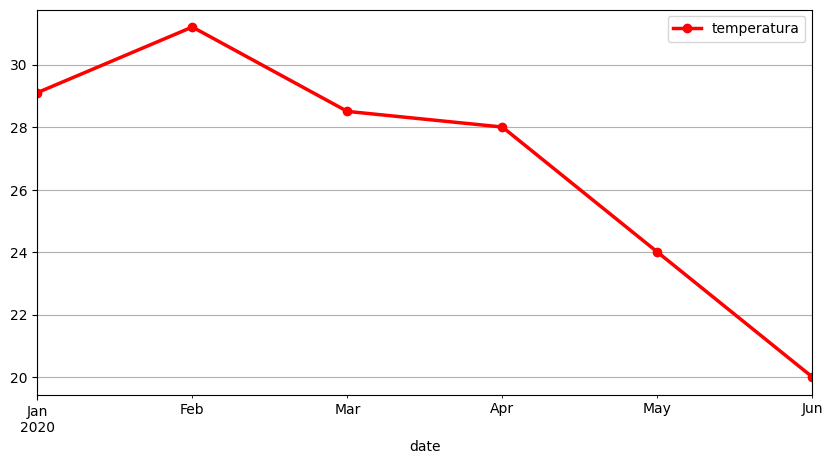

In [50]:
# Plot .... Color Picker
df.plot(style='-o' , linewidth=2.5, color='red', figsize=(10,5), grid=True);

In [101]:
# Extração de x e y:
x, y = df[['temperatura']].values, df[['classification']].values
print('x:\n',x,'\n')
print('y:\n',y,'\n')

x:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]] 

y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']] 



In [102]:
# Pré Processamento
from sklearn.preprocessing import LabelEncoder

# Conversão para Valores Numericos
le = LabelEncoder() # Label Enconder
y = le.fit_transform(y.ravel())
print('y:',y)

y: [3 2 3 3 0 1]


# **Regressão Linear**

In [139]:
# Modelo
from sklearn.linear_model import LogisticRegression

# Classificador
clf = LogisticRegression()
clf.fit(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [8734, 17379]

In [104]:
# Add de Valores de Temperatura sendo Separado Linearmente
x_test = np.linspace(start=0., stop=45., num=100).reshape(-1, 1)

# Predição desse Valores
y_pred = clf.predict(x_test)

In [56]:
#print(x_test)

In [57]:
#print(y_pred)

In [105]:
# Conversão de y_pred para os Dados Original
y_pred = le.inverse_transform(y_pred)
print(y_pred)

['frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'confortavel' 'confortavel' 'confortavel' 'confortavel' 'confortavel'
 'confortavel' 'quente' 'quente' 'quente' 'quente' 'quente' 'quente'
 'quente' 'quente' 'quente' 'quente' 'quente' 'quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito 

In [106]:
# Output do DataFrame
output = {'new_temp': x_test.ravel(),
          'new_class': y_pred.ravel()}

output = pd.DataFrame(output)

# Estatistica
output.info

<bound method DataFrame.info of      new_temp     new_class
0    0.000000          frio
1    0.454545          frio
2    0.909091          frio
3    1.363636          frio
4    1.818182          frio
..        ...           ...
95  43.181818  muito quente
96  43.636364  muito quente
97  44.090909  muito quente
98  44.545455  muito quente
99  45.000000  muito quente

[100 rows x 2 columns]>

In [107]:
output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


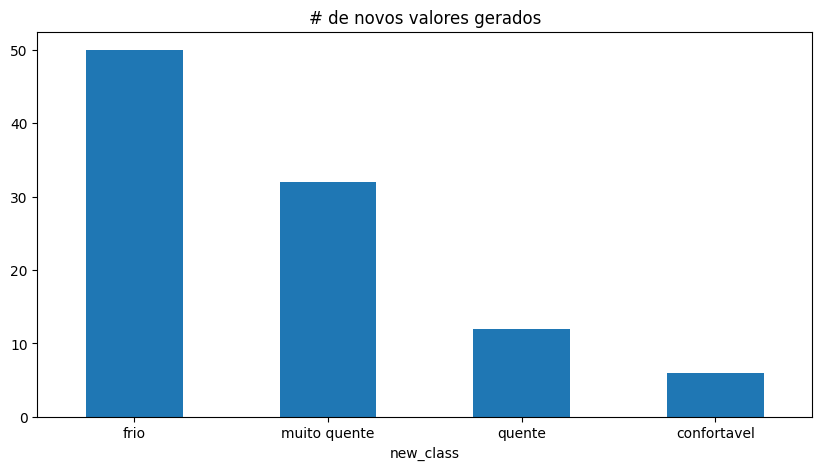

In [108]:
# Contagem dos Valores Gerados
output['new_class'].value_counts().plot.bar(figsize=(10,5), rot = 0, title="# de novos valores gerados");

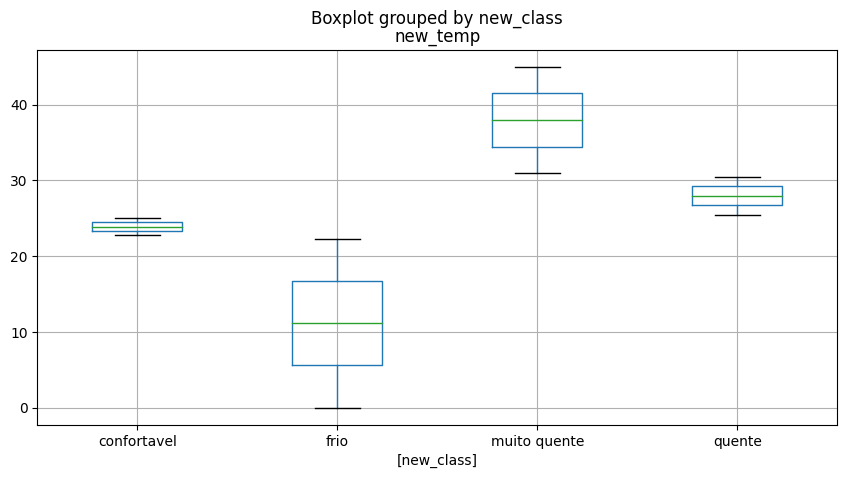

In [109]:
# Distribuição dos Dados
output.boxplot(by='new_class', figsize=(10,5));

In [114]:
def classify_temp():
    ''' Classifica o input do Usuário '''

    cond = True
    while cond:
        # input de temperatura
        temp = input("Digite uma Temperatura (Graus Celsius): ")
        # Transformar em Array
        temp = np.array(float(temp)).reshape(-1,1)
        # Classificação
        class_temp = clf.predict(temp)
        # Transformação Inversa para String
        class_temp = le.inverse_transform(class_temp)
        # Classificação Mostrada
        print(f'Classificação da Temperatura: {temp.ravel()[0]} é: ', class_temp[0])
        # Continuar ?
        resp = input('Deseja Continuar? y/n: ')
        if resp.lower() == 'y':
            cond = True
        elif resp.lower() == 'n':
            cond = False
            break






In [29]:
classify_temp()

Digite uma Temperatura (Graus Celsius): 100
Classificação da Temperatura: 100.0 é:  muito quente
Deseja Continuar? y/n: n


# **Regressão Linear - Sklearn x Numpy**

In [85]:
# Visualização de Dados
import matplotlib.pyplot as plt

# Dados
x = [-1., -0.77777778, -0.55555556, -0.3333333, -0.1111111, 0.1111111,
     0.3333333, 0.55555556, 0.77777778, 1.]

y = [-1.13956201, -0.57177999, -0.21697033, 0.5425699, 0.49406657, 1.14972239,
     1.64228553, 2.1749824, 2.64773614, 2.956844202]

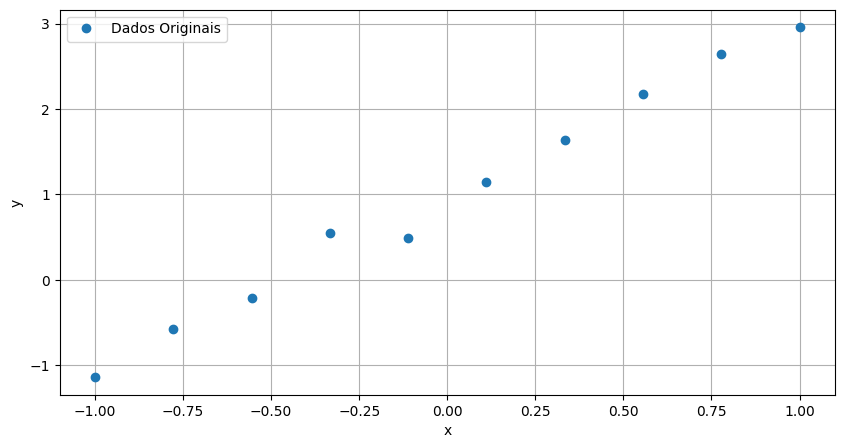

In [86]:
# Plot de Dados
plt.figure(figsize=(10,5))
# plt.plot(x, y, label='Dados Originais')
plt.plot(x, y, 'o', label='Dados Originais')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [87]:
x,y= np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

In [ ]:
# Modelo
from sklearn.linear_model import LinearRegression

# Classificador
# clf = LogisticRegression()
# clf.fit(x,y)

In [ ]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [ ]:
# Adicinando Bias: Para Estimar 'b' - Target
# X = np.hstack((x, np.ones(x.shape)))

# Estimando 'a' e 'b'
# beta = np.linalg.pinv(X).dot(y)
# print('Valor Estimado de a:', beta[0][0])
# print('Valor Estimado de b:', beta[1][0])

print('a estimado: ', reg.coef_.ravel()[0])
print('b estimado: ', reg.intercept_[0])

a estimado:  2.0541500603219673
b estimado:  0.9679894802


In [ ]:
# Predição desse Valores
y_pred = reg.predict(x)

In [ ]:
# Score
score = reg.score(x, y)
print('Metrica: ',score)

Metrica:  0.9911602899367004


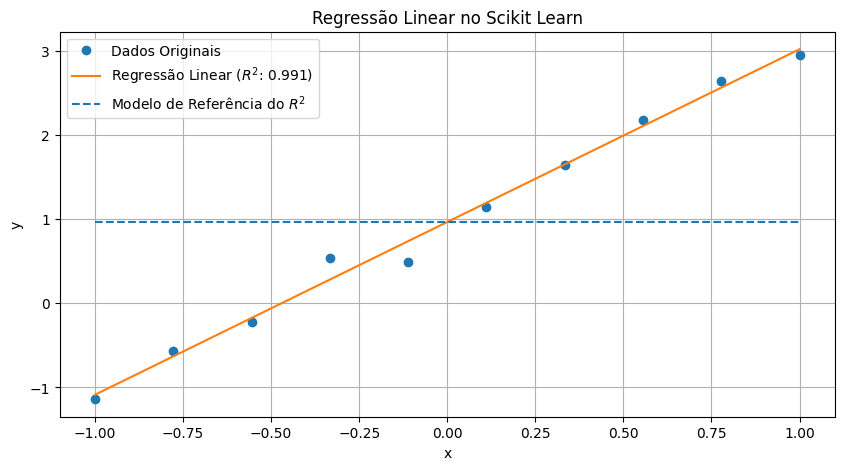

In [ ]:
# Plot de Dados
plt.figure(figsize=(10,5))
plt.plot(x, y,'o',label='Dados Originais')
plt.plot(x, y_pred, label='Regressão Linear ($R^2$: {:.3f})'.format(score))
plt.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), linestyle='dashed', label = 'Modelo de Referência do $R^2$')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão Linear no Scikit Learn")
plt.grid()
plt.show()

In [ ]:
# Erro Quadrático Médio
# Função para o Cálculo

def mse(y_true, y_pred, is_ref = False):

  # mse modelo
  if is_ref:
    mse = ((y_true - y_true.mean()**2).mean())
  else:
    mse = ((y_true - y_pred)**2).mean()

  return mse

In [ ]:
# Função para Cálculo do Coeficiente de Determinação R2
def r2(mse_reg, mse_ref):
  return 1 - mse_reg/mse_ref

In [ ]:
# y_pred e y_true
print('y_true: ', y.ravel())
print('y_pred: ', y_pred.ravel())

y_true:  [-1.13956201 -0.57177999 -0.21697033  0.5425699   0.49406657  1.14972239
  1.64228553  2.1749824   2.64773614  2.9568442 ]
y_pred:  [-1.08616058 -0.62968279 -0.17320501  0.28327286  0.73975061  1.19622835
  1.6527061   2.10918397  2.56566175  3.02213954]


In [ ]:
mse_reg = mse(y_true=y, y_pred=y_pred)
print('MSE do Modelo de Regressão: ', mse_reg)
mse_ref = mse(y_true=y, y_pred=y_pred, is_ref=True)
print('MSE do Modelo de Referência: ', mse_ref)

MSE do Modelo de Regressão:  0.015331596376445775
MSE do Modelo de Referência:  0.030985846422133978


In [ ]:
r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)
print('Metrica: ',r2_score)

Metrica:  0.5052064685412619


# **FIM MÓDULO 2**

In [135]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://pycourse.s3.amazonaws.com/bike-sharing.csv")

df.describe
df

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [65]:
print('Qual a média da coluna windspeed: ',df['windspeed'].mean())

Qual a média da coluna windspeed:  0.19009760630646177


In [66]:
print('Qual a média da coluna temp: ',df['temp'].describe())

Qual a média da coluna temp:  count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64


In [125]:
print('Quantos registros existem para o ano de 2011: \n', df[df['year'] == 0])

Quantos registros existem para o ano de 2011: 
         datetime  rec_id  season  year  month  hour  is_holiday  weekday  \
0     2011-01-01       1       1     0      1     0           0        6   
1     2011-01-01       2       1     0      1     1           0        6   
2     2011-01-01       3       1     0      1     2           0        6   
3     2011-01-01       4       1     0      1     3           0        6   
4     2011-01-01       5       1     0      1     4           0        6   
...          ...     ...     ...   ...    ...   ...         ...      ...   
8640  2011-12-31    8641       1     0     12    19           0        6   
8641  2011-12-31    8642       1     0     12    20           0        6   
8642  2011-12-31    8643       1     0     12    21           0        6   
8643  2011-12-31    8644       1     0     12    22           0        6   
8644  2011-12-31    8645       1     0     12    23           0        6   

      is_workingday  weather_condition 

In [126]:
print('Quantos registros existem para o ano de 2012:\n',df[df['year'] == 1])

Quantos registros existem para o ano de 2012:
          datetime  rec_id  season  year  month  hour  is_holiday  weekday  \
8645   2012-01-01    8646       1     1      1     0           0        0   
8646   2012-01-01    8647       1     1      1     1           0        0   
8647   2012-01-01    8648       1     1      1     2           0        0   
8648   2012-01-01    8649       1     1      1     3           0        0   
8649   2012-01-01    8650       1     1      1     4           0        0   
...           ...     ...     ...   ...    ...   ...         ...      ...   
17374  2012-12-31   17375       1     1     12    19           0        1   
17375  2012-12-31   17376       1     1     12    20           0        1   
17376  2012-12-31   17377       1     1     12    21           0        1   
17377  2012-12-31   17378       1     1     12    22           0        1   
17378  2012-12-31   17379       1     1     12    23           0        1   

       is_workingday  weathe

In [127]:
print('Qual a média da coluna windspeed: ', df['windspeed'].mean())

Qual a média da coluna windspeed:  0.19009760630646177


In [136]:
df = df.set_index('year')
df
x = df.loc[df.index == 1, ['total_count']].values
z = df.loc[df.index == 0, ['total_count']].values
y = df['total_count'].values

print(f'Total de locações em 2012: {np.sum(x)}')
print(f'Total de locações em 2011: {np.sum(z)}')
print(f'Total geral de locações: {np.sum(y)}')

Total de locações em 2012: 2049576
Total de locações em 2011: 1243103
Total geral de locações: 3292679


In [131]:
print('Qual estação do ano contém a maior média de locações de bicicletas?')
print('Qual estação do ano contém a menor média de locações de bicicletas?\n')
print(df.groupby(by='season'))

Qual estação do ano contém a maior média de locações de bicicletas?
Qual estação do ano contém a menor média de locações de bicicletas?



In [74]:
print('Qual horário do dia contém a maior média de locações de bicicletas?')
print('Qual horário do dia contém a menor média de locações de bicicletas?\n')
df.groupby(by='hour')
#print(df.groupby(by='hour').mean())

Qual horário do dia contém a maior média de locações de bicicletas?
Qual horário do dia contém a menor média de locações de bicicletas?



In [80]:
print('Que dia da semana contém a maior média de locações de bicicletas?')
print('Que dia da semana contém a menor média de locações de bicicletas?\n')
df.groupby(by='weekday')
#print(df.groupby(by='weekday').mean())

Que dia da semana contém a maior média de locações de bicicletas?
Que dia da semana contém a menor média de locações de bicicletas?



In [132]:
print('Às quartas-feiras (weekday = 3), qual o horário do dia contém a maior média de locações de bicicletas?')
df = df.set_index('weekday')
q = df.loc[df.index == 3, ['hour', 'total_count']]
q.groupby(by='hour')
print(q.groupby(by='hour').mean())


Às quartas-feiras (weekday = 3), qual o horário do dia contém a maior média de locações de bicicletas?
      total_count
hour             
0       34.557692
1       15.336538
2        7.813725
3        4.888889
4        4.968750
5       25.750000
6      107.807692
7      303.980769
8      488.326923
9      238.528846
10     131.894231
11     152.201923
12     193.903846
13     185.826923
14     170.548077
15     181.288462
16     272.961538
17     513.144231
18     494.029126
19     357.504854
20     256.660194
21     194.669903
22     143.689320
23      83.737864


In [133]:
print('Aos sábados (weekday = 6), qual o horário do dia contém a maior média de locações de bicicletas?')
s = df.loc[df.index == 6, ['hour', 'total_count']]
s.groupby(by='hour')
print(s.groupby(by='hour').mean())

Aos sábados (weekday = 6), qual o horário do dia contém a maior média de locações de bicicletas?
      total_count
hour             
0       94.304762
1       67.780952
2       50.495238
3       22.885714
4        7.657143
5        8.291262
6       21.000000
7       45.961905
8      114.476190
9      186.790476
10     263.723810
11     328.609524
12     375.380952
13     385.371429
14     381.333333
15     382.428571
16     366.142857
17     334.409524
18     292.048077
19     239.932692
20     180.865385
21     156.000000
22     139.663462
23     115.855769


# **TREINO**

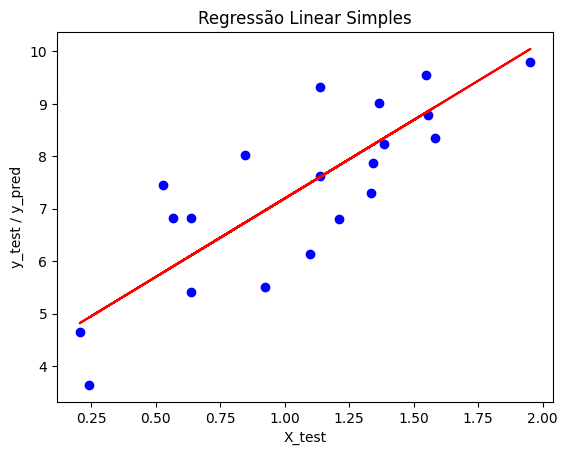

In [122]:
# Importar as bibliotecas necessárias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)   # Variável independente (features)
y = 4 + 3 * X + np.random.randn(100, 1)  # Variável dependente (target)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = model.predict(X_test)

# Visualizar os resultados
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Regressão Linear Simples')
plt.xlabel('X_test')
plt.ylabel('y_test / y_pred')
plt.show()

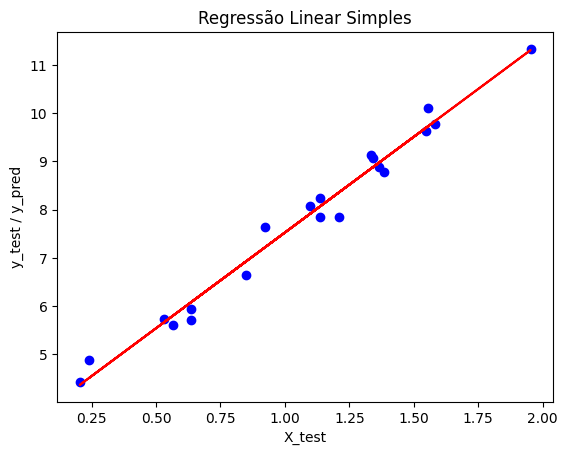

In [123]:
# Importar as bibliotecas necessárias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(0);
X = 2* np.random.rand(100,1)
y = 3 + 4 * X + np.random.rand(100,1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = model.predict(X_test)


# Visualizar os resultados
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Regressão Linear Simples')
plt.xlabel('X_test')
plt.ylabel('y_test / y_pred')
plt.show()
